Donades les [dades de la conselleria de Salut](https://analisi.transparenciacatalunya.cat/Salut/Vacunaci-per-al-COVID-19-dosis-administrades-per-r/tp23-dey4) del 1 d'agost del 2021 sobre vacunacions calcula:

- **1.** Quantes persones s'an vacunat amb la primera vacuna? I amb la segona? I quantes persones han demanat cita i no han assistit?
- **2.** Mostra un gràfic que mostri la població vacunada per edats amb primera i segona dosi.
- **3.** Mostra el gràfic anterior mostrant els percentatges de grups utilitzant les [dades de l'1 de gener de 2021 sobre població per edats de l'IDESCAT](https://analisi.transparenciacatalunya.cat/Salut/Vacunaci-per-al-COVID-19-dosis-administrades-per-r/tp23-dey4) .
- **4.** Mostra un gràfic amb el número de vacunes administrades segons cada fabricant.
- **5.** Mostra un gràfic on es superposi la suma dels vacunats amb pauta completa acumulada amb el número de vacunes administrades diàriament.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from datetime import datetime

%matplotlib inline

### Import CSV from local 

In [2]:
# handlig dates
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')

In [3]:
# Import CSV from local 
vac_csv = f"C:/capes_sql/post_covid/vacunacio.csv"
vac_df = pd.read_csv(vac_csv, sep=',',parse_dates=['DATA'], date_parser=dateparse)
vac_df.head(2)

,SEXE_CODI,SEXE,REGIO_CODI,REGIO,SECTOR_CODI,SECTOR,AGA_CODI,AGA,ABS_CODI,ABS,EDAT,DOSI,DATA,FABRICANT,NO_VACUNAT,RECOMPTE
0,0.0,Home,7803.0,BARCELONA CIUTAT,7851.0,BARCELONA EIXAMPLE,70.0,Barcelona Dreta,28.0,BARCELONA 2-H,75 a 79,1,2021-03-24,Moderna / Lonza,NaN,2
1,1.0,Dona,7802.0,METROPOLITANA NORD,7867.0,BARCELONÈS NORD I MARESME,33.0,Maresme Central,154.0,MATARÓ 3,50 a 54,2,2021-04-22,BioNTech / Pfizer,NaN,1


### **1.** Quantes persones s'han vacunat amb la primera vacuna? I amb la segona? I quantes persones han demanat cita i no han assistit?

In this dataset the people with unfavorable medical indications for vaccination are registered as NO_VACUNAT

In [4]:
# people non vaccinated
vac_by_prod = vac_df.groupby(["NO_VACUNAT"])[["RECOMPTE"]].sum() 
vac_by_prod.head()

,RECOMPTE
NO_VACUNAT,
No vacunat,90954


In [5]:
# drop Non vaccinated people rows by condition
vac_df = vac_df[vac_df['NO_VACUNAT'] != "No vacunat"]

In [6]:
# sum "RECOMPTE" by first dose "DOSI"
vac_df.query("DOSI == 1")['RECOMPTE'].sum()

5080329

In [7]:
# sum "RECOMPTE" by second dose "DOSI"
vac_df.query("DOSI == 2")['RECOMPTE'].sum()

4041707

### **2.** Mostra un gràfic que mostri la població vacunada per edats amb primera i segona dosi.

In [8]:
# Select rows with first dose
vac_first_dose = vac_df[vac_df.DOSI == 1]
#group by age and sum RECOMPTE
vac_first_dose_by_age = vac_first_dose.groupby(["EDAT"])[["RECOMPTE"]].sum()
# Rename RECOMPTE column to DOSIU
vac_first_dose_by_age.rename(columns = {'RECOMPTE':'DOSI_U'}, inplace = True)

# Select rows with second dose
vac_second_dose = vac_df[vac_df.DOSI == 2]
# Group by age and sum RECOMPTE
vac_second_dose_by_age = vac_second_dose.groupby(["EDAT"])[["RECOMPTE"]].sum()
# Rename RECOMPTE column to DOSIDOS
vac_second_dose_by_age.rename(columns = {'RECOMPTE':'DOSI_DOS'}, inplace = True)

In [9]:
vac_second_dose_by_age.head()

,DOSI_DOS
EDAT,
0 a 14,1212
15 a 19,43333
20 a 24,74639
25 a 29,87359
30 a 34,150647


In [10]:
# merge the two dataframe
vac_by_age_m = pd.merge(vac_first_dose_by_age, vac_second_dose_by_age, on='EDAT')
vac_by_age_m

,DOSI_U,DOSI_DOS
EDAT,,
0 a 14,2041,1212
15 a 19,171022,43333
20 a 24,210261,74639
25 a 29,220901,87359
30 a 34,266027,150647
35 a 39,361092,273558
40 a 44,505947,384983
45 a 49,546923,456759
50 a 54,503853,446475


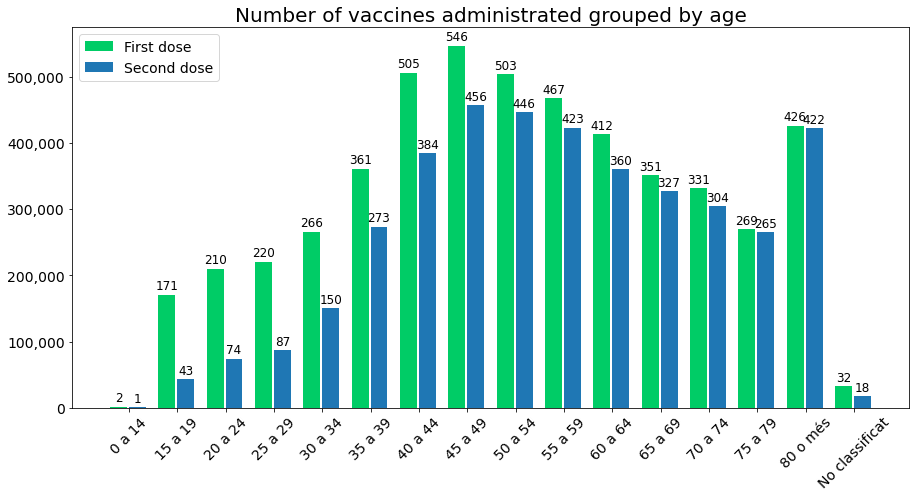

In [11]:
# plot the df
fig, ax = plt.subplots(figsize=(15, 7))

labels = vac_by_age_m.index #labels x-axis 

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

d1 = ax.bar(x - width/2 - 0.04, #bars position
            vac_by_age_m.DOSI_U, 
            width,
            label='First dose', 
            color="#00cc66")

d2 = ax.bar(x + width/2, vac_by_age_m.DOSI_DOS, width, label='Second dose')

ax.set_xticks(x)
ax.set_xticklabels(labels) # custom labels x-axis

ax.bar_label(d1, #d1 = bar container
             labels= vac_by_age_m.DOSI_U//1000, # // int division
             padding=2, fontsize=12)
ax.bar_label(d2, labels= vac_by_age_m.DOSI_DOS//1000, padding=2, fontsize=12)

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("Number of vaccines administrated grouped by age",  fontsize=20)
plt.xticks(rotation=45, fontsize=14) # rotation axis tags
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=14)

plt.show()

### 3. Mostra el gràfic anterior mostrant els percentatges de grup utilitzant les [dades de l'1 de gener de 2021 sobre població per edats de l'IDESCAT](https://analisi.transparenciacatalunya.cat/Salut/Vacunaci-per-al-COVID-19-dosis-administrades-per-r/tp23-dey4) .

In [12]:
pop_by_age = [1157226, 411266, 402872, 434341, 461705, 522779, 643156, 649531, 581232,
              521531, 459344, 389980, 352045, 279754, 449998]
df_pop = pd.DataFrame(pop_by_age)


In [13]:
vac_by_age_m = vac_by_age_m.drop(['No classificat'], axis=0) # remove values non classified
vac_by_age_m.index.name = None #remove tag axis
vac_by_age_m['POP'] = pop_by_age  # add list as column

In [14]:
# % first dose
vac_by_age_m['XDOSI_U'] =  vac_by_age_m['DOSI_U'] / vac_by_age_m['POP'] * 100
# % second dose
vac_by_age_m['XDOSI_D'] =  vac_by_age_m['DOSI_DOS'] / vac_by_age_m['POP'] * 100

In [15]:
vac_by_age_m

,DOSI_U,DOSI_DOS,POP,XDOSI_U,XDOSI_D
0 a 14,2041,1212,1157226,0.176370,0.104733
15 a 19,171022,43333,411266,41.584279,10.536490
20 a 24,210261,74639,402872,52.190522,18.526728
25 a 29,220901,87359,434341,50.858887,20.112999
30 a 34,266027,150647,461705,57.618393,32.628410
35 a 39,361092,273558,522779,69.071634,52.327657
40 a 44,505947,384983,643156,78.666296,59.858417
45 a 49,546923,456759,649531,84.202756,70.321355
50 a 54,503853,446475,581232,86.687072,76.815282
55 a 59,467702,423011,521531,89.678658,81.109464


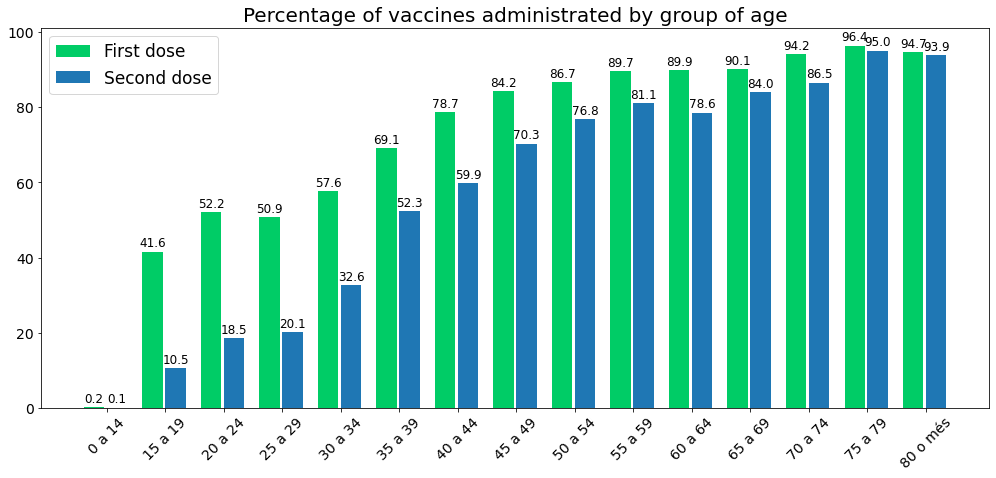

In [16]:
# plot the df
fig, ax = plt.subplots(figsize=(17, 7))

labels = vac_by_age_m.index #labels x-axis 

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

d1 = ax.bar(x - width/2 - 0.04, #bars position
            vac_by_age_m.XDOSI_U, 
            width,
            label='First dose', 
            color="#00cc66")

d2 = ax.bar(x + width/2, vac_by_age_m.XDOSI_D, width, label='Second dose')

ax.set_xticks(x)
ax.set_xticklabels(labels) # custom labels x-axis

# bar labels
vac_round = vac_by_age_m.round(1)
ax.bar_label(d1, labels= vac_round.XDOSI_U, padding=2, fontsize=12)
ax.bar_label(d2, labels= vac_round.XDOSI_D, padding=2, fontsize=12)


plt.title("Percentage of vaccines administrated by group of age",  fontsize=20)
plt.xticks(rotation=45, fontsize=14) # rotation axis tags
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=17)

plt.show()

# **4.** Mostra un gràfic amb el número de vacunes administrades segons cada fabricant.

In [17]:
#group by FABRICANT and sum RECOMPTE
vac_by_prod = vac_df.groupby(["FABRICANT"])[["RECOMPTE"]].sum()
vac_by_prod.head()

,RECOMPTE
FABRICANT,
BioNTech / Pfizer,6212576
J&J / Janssen,326248
Moderna / Lonza,963950
Oxford / AstraZeneca,1619262


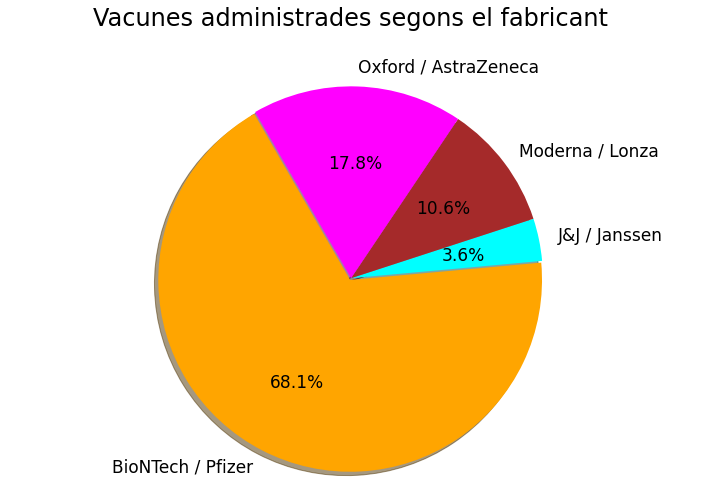

In [18]:
explode = (0.01, 0, 0, 0)  # only "explode" the data

# Creating color parameters
colors = ( "orange", "cyan", "brown","magenta")

fig1, ax1 = plt.subplots(figsize=(10,7))

ax1.pie(vac_by_prod.RECOMPTE, 
        explode=explode, 
        labels=vac_by_prod.index,  
        autopct='%1.1f%%' ,
        shadow=True, 
        startangle=120,
       colors=colors,
       textprops = dict(color ="black", fontsize=17, family='sans-serif'))

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Vacunes administrades segons el fabricant",  fontsize=24,  y=1.08) # y avoid overlaps
plt.xticks(fontsize=14)


plt.tight_layout()
plt.show()

## 5. Mostra un gràfic on es superposi la suma dels vacunats amb pauta completa acumulada amb el número de vacunes administrades diàriament.


In [19]:
 vac_df.head()

,SEXE_CODI,SEXE,REGIO_CODI,REGIO,SECTOR_CODI,SECTOR,AGA_CODI,AGA,ABS_CODI,ABS,EDAT,DOSI,DATA,FABRICANT,NO_VACUNAT,RECOMPTE
0,0.0,Home,7803.0,BARCELONA CIUTAT,7851.0,BARCELONA EIXAMPLE,70.0,Barcelona Dreta,28.0,BARCELONA 2-H,75 a 79,1,2021-03-24,Moderna / Lonza,NaN,2
1,1.0,Dona,7802.0,METROPOLITANA NORD,7867.0,BARCELONÈS NORD I MARESME,33.0,Maresme Central,154.0,MATARÓ 3,50 a 54,2,2021-04-22,BioNTech / Pfizer,NaN,1
2,0.0,Home,7803.0,BARCELONA CIUTAT,7851.0,BARCELONA EIXAMPLE,70.0,Barcelona Dreta,31.0,BARCELONA 2-K,60 a 64,1,2021-04-22,Oxford / AstraZeneca,NaN,4
3,0.0,Home,7801.0,METROPOLITANA SUD,7866.0,BAIX LLOBREGAT CENTRE-LITORAL I L'H,25.0,L'Hospitalet Sud i el Prat de Llobregat,299.0,L'HOSPITALET DE LLOBREGAT 12 (BELLVITGE),30 a 34,1,2021-07-31,BioNTech / Pfizer,NaN,1
4,1.0,Dona,7801.0,METROPOLITANA SUD,7831.0,BAIX LLOBREGAT NORD,65.0,Baix Llobregat Nord,360.0,MARTORELL RURAL,55 a 59,2,2021-04-23,Moderna / Lonza,NaN,1


In [20]:
# selection DOSI 1 
# Select rows with first dose
vac_first_dose = vac_df[vac_df.DOSI == 1]
#group by DATA and sum RECOMPTE
vac_first_dose_by_date = vac_first_dose.groupby(["DATA"])[["RECOMPTE"]].sum()

# selection DOSI 2
# Select rows with second dose
vac_second_dose = vac_df[vac_df.DOSI == 2]
#group by DATA and sum RECOMPTE
vac_second_dose_by_date = vac_second_dose.groupby(["DATA"])[["RECOMPTE"]].sum()

In [21]:
# Rename each column - appending “insitu”
vac_second_dose_by_date.rename(columns={"RECOMPTE": "REC_DOS"},
                      inplace=True)  # Modify the dataframe columns

vac_second_dose_by_date.tail()

,REC_DOS
DATA,
2021-07-27,24477
2021-07-28,34225
2021-07-29,35625
2021-07-30,34271
2021-07-31,16281


In [22]:
#remove index axis tag
vac_first_dose_by_date.index.name = None 
vac_second_dose_by_date.index.name = None

In [23]:
vac_first_dose_by_date.tail()

,RECOMPTE
2021-07-27,38841
2021-07-28,37326
2021-07-29,32013
2021-07-30,32825
2021-07-31,7907


In [24]:
# Joining on index 
df_vac_app =vac_first_dose_by_date.join(vac_second_dose_by_date, how="outer")
df_vac_app

,RECOMPTE,REC_DOS
2020-12-27,805,NaN
2020-12-28,3,NaN
2020-12-29,451,NaN
2020-12-30,2609,NaN
2020-12-31,2586,NaN
...,...,...
2021-07-27,38841,24477.0
2021-07-28,37326,34225.0
2021-07-29,32013,35625.0
2021-07-30,32825,34271.0


In [25]:
df_vac_app = df_vac_app.fillna(0) # fill the null values as 0

In [26]:
# cummulative sum second dose
df_vac_app["cumsum2"] = df_vac_app['REC_DOS'].cumsum()

# cummulative sum second dose
df_vac_app["cumsum"] = df_vac_app['RECOMPTE'].cumsum()

In [27]:
df_vac_app

,RECOMPTE,REC_DOS,cumsum2,cumsum
2020-12-27,805,0.0,0.0,805
2020-12-28,3,0.0,0.0,808
2020-12-29,451,0.0,0.0,1259
2020-12-30,2609,0.0,0.0,3868
2020-12-31,2586,0.0,0.0,6454
...,...,...,...,...
2021-07-27,38841,24477.0,3921305.0,4970258
2021-07-28,37326,34225.0,3955530.0,5007584
2021-07-29,32013,35625.0,3991155.0,5039597
2021-07-30,32825,34271.0,4025426.0,5072422


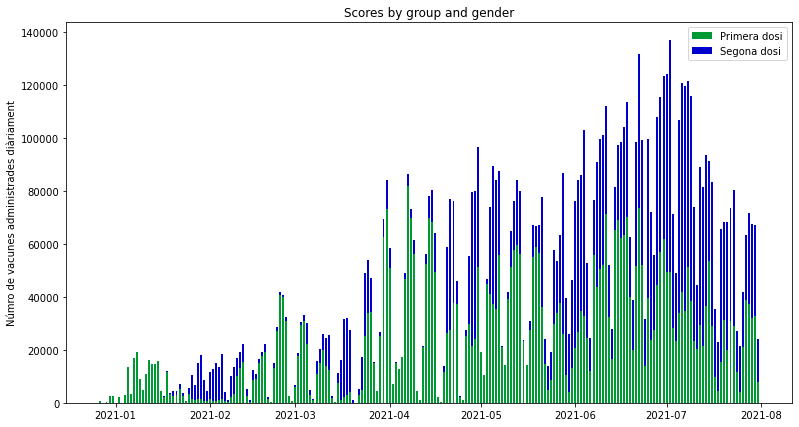

In [28]:
# Plot your data
fig, ax = plt.subplots(figsize=(13,7))

width_col = 0.65
labels = df_vac_app.index
    
ax.bar(labels, df_vac_app.RECOMPTE, width_col, label='Primera dosi', color='#009933') # first dose
ax.bar(labels, df_vac_app.REC_DOS, width_col, 
       bottom=df_vac_app["RECOMPTE"],
       label='Segona dosi', 
     color='#0000cc')


ax.set_ylabel('Númro de vacunes administrades diàriament')
ax.set_title('Scores by group and gender')
ax.legend()

Text(0, 0.5, 'Número de persones vacunades \n amb dos dosis')

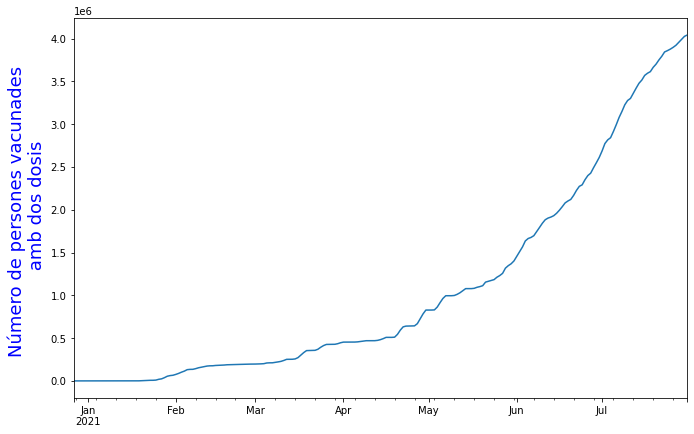

In [32]:
# Plot your data
fig, ax = plt.subplots(figsize=(11,7))
df_vac_app["cumsum2"].plot(ax=ax, label = "Cumulative Completed Vaccination")

# Make the y-axis label, ticks and tick labels match the line color.
ax.set_ylabel('Número de persones vacunades \n amb dos dosis', fontsize=18,  color='b')



# Turn off scientific notation
#ax.ticklabel_format(style='plain')

<BarContainer object of 217 artists>

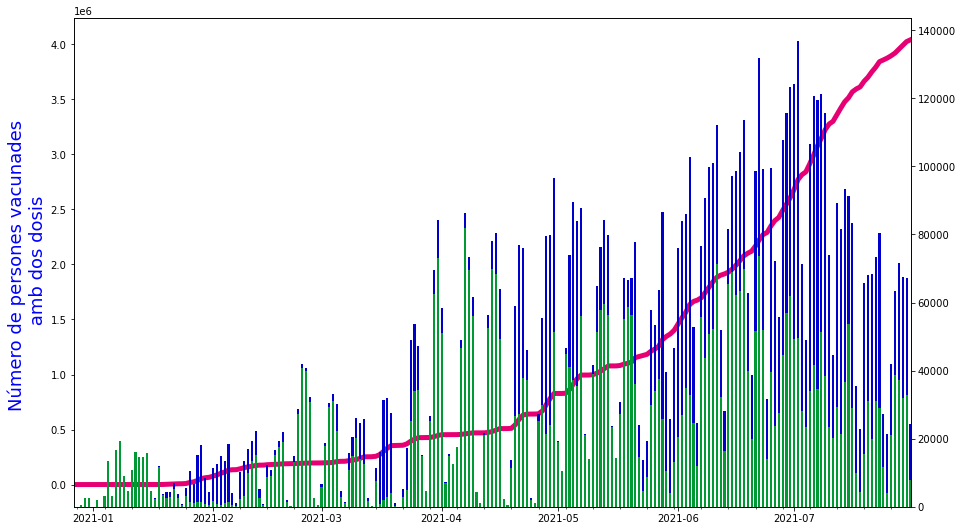

In [33]:
# Plot your data
fig, ax = plt.subplots(figsize=(15,9))

width_col = 0.57
labels = df_vac_app.index

#cummul
df_vac_app["cumsum2"].plot(ax=ax, label = "Cumulative Completed Vaccination", linewidth=5, color='#e60073')

# Make the y-axis label, ticks and tick labels match the line color.
ax.set_ylabel('Número de persones vacunades \n amb dos dosis', fontsize=18,  color='b')
#ax.tick_params('y', colors='b') # y axis color

ax2 = ax.twinx() # Create a new Axes with an invisible x-axis and an independent y-axis positioned opposite to the original

ax2.bar(labels, df_vac_app.RECOMPTE, width_col, label='Primera dosi', color='#009933') # first dose
ax2.bar(labels, df_vac_app.REC_DOS, width_col, bottom=df_vac_app["RECOMPTE"], label='Segona dosi', color='#0000cc')

# Turn off scientific notation
#ax.ticklabel_format(style='plain')

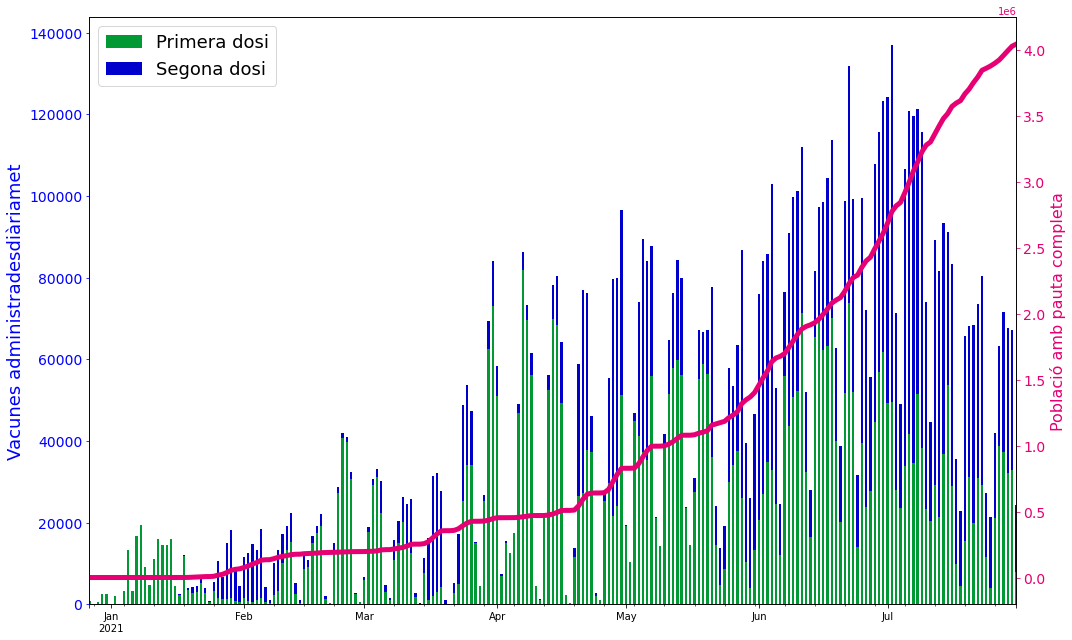

In [37]:
# Plot your data
fig, ax = plt.subplots(figsize=(15,9))

width_col = 0.54
labels = df_vac_app.index

ax2 = ax.twinx() # Create a new Axes with an invisible x-axis and an independent y-axis positioned opposite to the original

ax.bar(labels, df_vac_app.RECOMPTE, width_col, label='Primera dosi', color='#009933') # first dose
ax.bar(labels, df_vac_app.REC_DOS, width_col, bottom=df_vac_app["RECOMPTE"], label='Segona dosi', color='#0000cc')


#cummul
df_vac_app["cumsum2"].plot(ax=ax2, label = "Cumulative Completed Vaccination", linewidth=5, color='#e60073')

# Make the y-axis label, ticks and tick labels match the line color.
ax.set_ylabel('Vacunes administradesdiàriamet', fontsize=18,  color='b')
ax.tick_params('y', colors='b', labelsize=14) 

ax2.set_ylabel('Població amb pauta completa', fontsize=16,  color='#e60073')
ax2.tick_params('y', colors='#e60073', labelsize=14) 
plt.tight_layout()
ax.legend(loc='upper left', fontsize=18)
